# ﾁｮｯﾄﾃﾞｷﾙ統計学

### ﾁｮｯﾄﾃﾞｷﾙ統計学とは？
- 統計学の世界を少しだけ覗いてみるという趣旨の勉強会です。
- 基本的なデータの要約方法、可視化、(ﾁｮｯﾄﾀﾞｹ確率)、 ﾁｮｯﾄｼﾀ分析について説明します。
- ~お給料を上げたい一心で~ 頑張ります。

### 始める前に
* この資料はGitHubで公開しているので、お手元の環境で試せます。 ⭐️ つけてくれてもいいです。 
* リポジトリ: `git@github.com:Soichiro-Fujioka/chotto-dekiru-DS.git`
* 実行環境は `python3 + juputer (lab)` ですが、環境構築しなくても `Google Colaboratory` でWEB上でも実行できます。
* スライドで見たい場合は `RISE` モジュールのインストールと `jupyter (not lab)` をご使用ください。
* モジュールは `!pip install pandas` とかでノートブック上でインストール可能です。

### まずは必要そうな(!)モジュールをインポート

In [1]:
import pandas as pd   # データを扱うライブラリ
import numpy as np   # 言わずと知れた数値計算ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # イケてる可視化ライブラリ
import statsmodels # 統計手法ライブラリ (scikit-learnは機械学習編で使います)
plt.xkcd() # お気に入り可視化テーマ

### データセットのロード
今回はボストン市の住宅価格のデータを使います。  
他にはアヤメ(`iris`)の分類データや、タイタニックの生存データがチュートリアルでよく使われます。

In [2]:
from sklearn.datasets import load_boston
boston = load_boston() # データのロード
boston_y = pd.DataFrame(boston.target, columns=['PRICE']) # 価格データ
boston_X = pd.DataFrame(boston.data, columns=boston.feature_names) # 価格以外のデータ
boston = pd.concat([boston_y, boston_X], axis=1) # 上二つをがっちゃんこ

In [3]:
boston.head() # とりあえず最初の5行だけ見てみる

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print('行数: {}   列数: {}'.format(boston.shape[0], boston.shape[1]))

行数: 506   列数: 14


| 変数名 | 説明 |
| --- | --- |
| PRICE | 1,000 ドル台でオーナーが所有する住宅の価格の中央値 単位: 1,000(USD) |
| CRIM | 人口 1 人当たりの犯罪発生数 |
| ZN | 25,000 平方フィート以上の住居区画の占める割合 |
| INDUS | 小売業以外の商業が占める面積の割合 |
| CHAS | チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外) |
| NOX | NOx の濃度 |
| RM | 住居の平均部屋数 |
| AGE | 1940 年より前に建てられた物件の割合 |
| DIS | 5 つのボストン市の雇用施設からの距離 (重み付け済) |
| RAD | 環状高速道路へのアクセスしやすさ |
| TAX | $10,000 ドルあたりの不動産税率の総計 |
| PTRATIO | 町毎の児童と教師の比率 |
| B	| 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2 |
| LSTAT	| 給与の低い職業に従事する人口の割合 (%) |

ref: [scikit-learn に付属しているデータセット](https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)

### それでは本題

### 統計学って何？

統計学とは、 `確率論` を拠所として、
- ①データの特徴を記述したり -> 平均、分散
- ②一部のデータから全体を推測したり -> 区間推定、仮説検定
- ③出来事の要因を明らかにしたり -> 回帰分析(AI❗️)、時系列解析

する学問

### ①データの特徴を記述

### まずはお馴染みの平均
$$
mean(x) = \bar{x} = \frac{1}{N}(x_1 + x_2 + \cdots + x_N)
$$

In [5]:
boston['PRICE'].mean() # or np.mean(boston['PRICE'])

22.532806324110698

 - 平均値は、データの代表値を表すもっとも手軽な方法ですが、データが偏っている場合は、注意が必要
 - 一般的に使われるのは算術平均ですが、他にも加重平均、幾何平均、調和平均など色々な種類があります

### どんな時に注意が必要？
- 分布が左右対象ではない場合、平均値は引っ張られる
- 平均以外にも中央値、最頻値も利用する
- 実際のデータの形(分布)を見てみることが**超大事**❗️

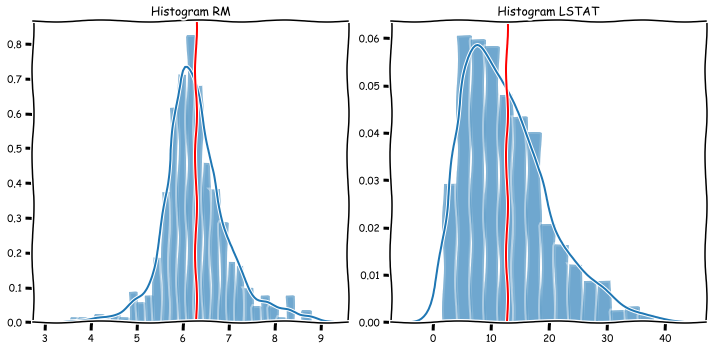

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='') 
ax1.set_title('Histogram RM')
ax1.axvline(boston.RM.mean(), 0, 1, color='red') #平均の垂直線を追加
sns.distplot(boston.LSTAT, ax=ax2, axlabel='')
ax2.set_title('Histogram LSTAT')
ax2.axvline(boston.LSTAT.mean(), 0, 1, color='red') #平均の垂直線を追加
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### 平均値がダメなら中央値
$$
median(x) = x_{median} =
\begin{cases}
 x_{(N + 1)/2}                                  & \text{if } N \text{ が奇数.} \\
 \dfrac{1}{2}( x_{N/2} + x_{N/2 + 1}) & \text{if } N \text{  が偶数.}
\end{cases}
$$

In [7]:
boston['PRICE'].median() # or np.median(boston['PRICE'])

21.2

- データを順番に並べた際の真ん中の値 (データの数が偶数の場合、真ん中に近い二つのデータの平均)
- 平均値と違い、外れ値の影響受けにくいが、1個のデータでもって代表値としていることに注意
- 実際のデータの形(分布)を見てみることが**超大事**❗️(2回目)

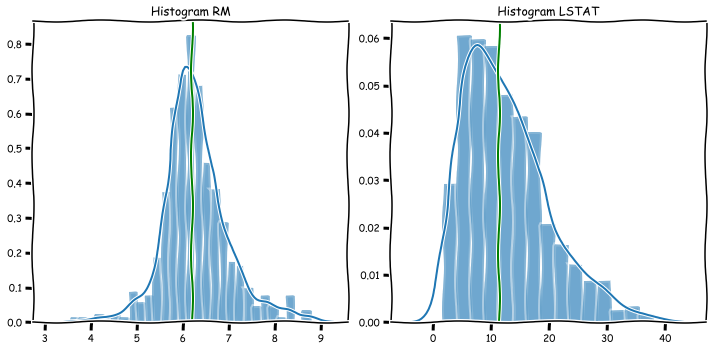

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='')
ax1.set_title('Histogram RM')
ax1.axvline(boston.RM.median(), 0, 1, color='green') # 中央値の垂直線を追加
sns.distplot(boston.LSTAT, ax=ax2, axlabel='')
ax2.set_title('Histogram LSTAT')
ax2.axvline(boston.LSTAT.median(), 0, 1, color='green') # 中央値の垂直線を追加
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### せっかくなので最頻値も
- 数式で表しにくい~めんどくさい~ので、テストの点数が `10, 20, 30, 30, 40, 50` だとすると、最も出現数が多い `30` が最頻値
- データが離散値ではなく連続値の場合は、`10~19`, `20~29` のように `10` 刻みにして、各階級に落とし込む
- ただし階級幅によって、最頻値が変わることに注意
- 実際のデータの形(分布)を見てみることが**超大事**❗️(n回目)

#### 参考までに・・・スタージェスの公式 *Sturges' formula*
- データの個数Nが与えられた時に**目安となる**階級幅kを得る公式
$$
k = \log_2 N + 1 
$$

In [9]:
stur = np.ceil(np.log2(boston.shape[0]) + 1)
print(stur)

10.0


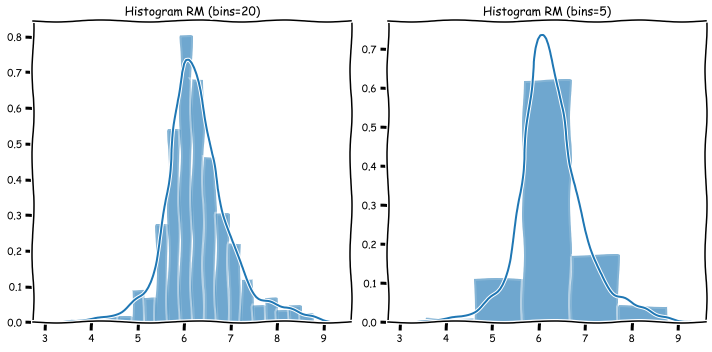

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='', bins=20) # binsは階級幅ではなく、階級の個数であることに注意
ax1.set_title('Histogram RM (bins=20)')
sns.distplot(boston.RM, ax=ax2, axlabel='', bins=5)
ax2.set_title('Histogram RM (bins=5)')
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### データのばらつきもみよう-分散
$$
{\sigma}^{2}=\frac{1}{N}\sum_{i=1}^{n}(x_{i} - \bar{x})^2
$$

In [11]:
boston['PRICE'].var(ddof=0) # or np.var(boston['PRICE']) 

84.4195561561656

- データがどれくらいばらついているかを測る指標
- 分散に平方根をとると **標準偏差** と呼ばれる指標になります
- 上のコードのddofは、degree of freedom(自由度)と呼ばれる少々ややこしい概念ですが、今回は省略します。Pandasではddof=1, Numpyではddof=0がデフォルトです。
- ddof=1の場合、$N$ ではなく $N-1$ で割ります。

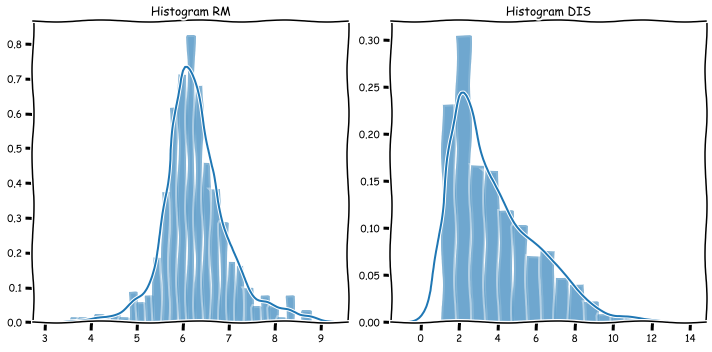

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='')
ax1.set_title('Histogram RM')
sns.distplot(boston.DIS, ax=ax2, axlabel='')
ax2.set_title('Histogram DIS')
plt.tight_layout() # グラフが重ならないようにする
plt.show()

In [13]:
RM_var = boston['RM'].var(ddof=0)
DIS_var = boston['DIS'].var(ddof=0)
print('RM_var: {}    DIS_var: {}'.format(RM_var, DIS_var))

RM_var: 0.49269521612976347    DIS_var: 4.425252261616489


### 予想通りDISの方が分散が大きい！ <- 実は罠です💀
- 分散の単位は、データの単位の2乗になるので、単純な比較はできない
- 変動係数を使いましょう！
- 変動係数は標準偏差(=つまり元のデータと同じ単位)を元のデータの単位で割るので、単位がない無名数になります
$$
C.V.=\frac{\sigma} {\overline x}
$$

In [15]:
RM_cv = np.sqrt(RM_var) / boston.RM.mean()
DIS_cv = np.sqrt(DIS_var) / boston.DIS.mean()
print('RM_cv: {}    DIS_cv: {}'.format(RM_cv, DIS_cv))

RM_cv: 0.1116886792567013    DIS_cv: 0.5543095373172995


#### 参考までに・・・標準化
- データの種類によって, 平均と分散が違うため、主に機械学習分野で学習結果の数値安定性を高めるために, 平均を0, 分散を1に変換する手法がよく使われます.
- 統計学分野では、後に解説する `推定`, `検定` 分野で使われます.
$$
z_{i} = \frac{x_{i} - \bar{x}} {\sigma}
$$

#### もうちょっと参考までに・・・偏差値
- 偏差値は標準化のバリエーションの一つで、平均を50, 分散を10に変換したものです。
$$
z'_{i} = 50 + \frac{10(x_{i} - \bar{x})} {\sigma}
$$

### ここまでのまとめ
- 代表値を表す指標は平均の他に、中央値、最頻値などがあります.
- データのばらつきを示す指標として、分散や標準偏差があります.
- 代表値だけでは、データの特性を見落としてしまうことがあるため、可視化することが重要❗️

今まで行った計算(の一部)はpandasの`describe`メソッドでも確認することができます。**基本(要約)統計量**とも呼ばれます。

In [16]:
boston.describe()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 2変量の関係をみてみる
- 今までは一つのデータについて着目しましたが、実際にはデータの種類が一つしかないということは希
- そこで2つのデータの関係性を説明する **散布図** と **相関係数** について説明します

### 散布図
- 二つのデータを、それぞれ *X* , *y* とし、それをプロットしたグラフ.
- 二つのデータの関係が直感的に見て取れます.
- 男女などのカテゴリカルな変数で色分けすると, データの特性をさらに深掘りできます.(今回のデータは全て連続値です)

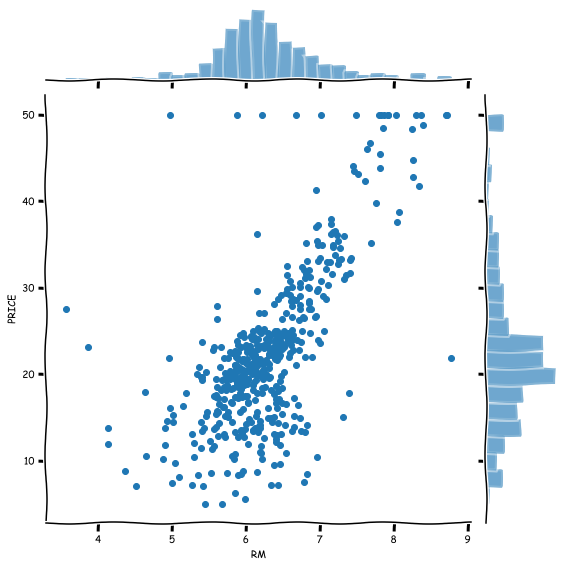

In [20]:
sns.jointplot(data=boston, x='RM', y='PRICE', size=8) #  kind='hex' オプションでヒートマップ表示をすることも可能
plt.show()

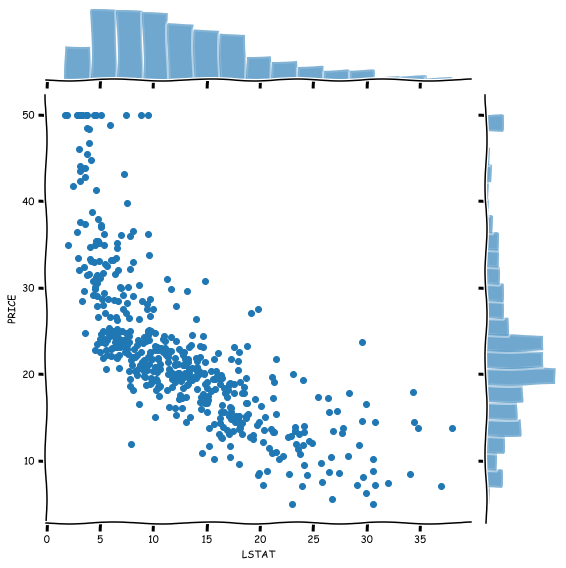

In [18]:
sns.jointplot(data=boston, x='LSTAT', y='PRICE', size=8)
plt.show()

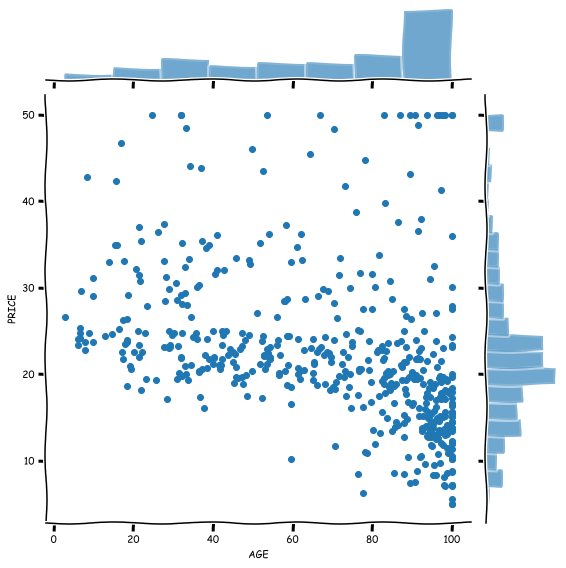

In [19]:
sns.jointplot(data=boston, x='AGE', y='PRICE', size=8)
plt.show()

### データの関係を数値として表す-相関係数
$$
\rho_{xy} 
 = 
 \frac{ \displaystyle 
  \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) 
 }{ 
  \bigg(\Big( \displaystyle \sum_{i=1}^n(x_{i}-\bar{x})^2 \Big)\Big( \sum_{i=1}^n(y_{i}-\bar{y})^2 \Big)\bigg)^{1/2}
 }
 =
 \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
$$

- 相関係数は二つのデータの **直線** を基準とした関係の指標で, -1から1範囲で値を取ります.
- データAが増えた時, データBの値も増えるなら、相関係数は正の値を取ります(=正の相関).
- データAが増えた時, データBの値が減るなら、相関係数は負の値を取ります(=負の相関).
- 二つのデータに関係がなければ、相関係数は0 (=無相関)

*PRICE* VS *RM*

In [21]:
np.corrcoef(boston.PRICE, boston.RM)[0][1]

0.695359947071539

*PRICE* VS *LSTAT*

In [22]:
np.corrcoef(boston.PRICE, boston.LSTAT)[0][1]

-0.7376627261740147

*PRICE* VS *AGE*

In [23]:
np.corrcoef(boston.PRICE, boston.AGE)[0][1]

-0.376954565004596

### 実際にはデータは種類複数あるので, 相関行列として一度に出した方が便利です
- よく使われるのピアソンの相関係数ですが, 他にケンドールの順位相関, スピアマンの順位相関係数などがあります.
- pandasの`corr` メソッドの引数`method`で'pearson', 'kendall', 'spearman'を指定します.

In [24]:
boston_corr = boston.corr(method='pearson')
boston_corr

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
PRICE,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


### ただ, 見にくいので, ヒートマップで表示しがちです

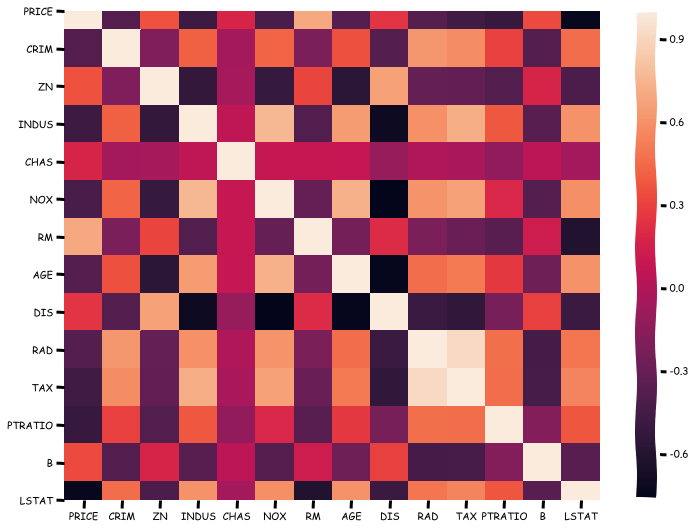

In [25]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(boston_corr)
plt.show()

### ご使用上の注意
- 相関係数はあくまで相関を表すだけで, 因果関係を表す訳ではない！
- 世の中には、同じ傾向(もしくは正反対の傾向)をもつテキトーなデータを二つとってきて, 関係がある！相関係数ﾊﾞｰﾝ!みたいな記事がはびこってます.
- 統計学には, 因果関係を扱う一大分野, `統計的因果推論` というものがありますが, **沼** です. めっちゃ難しいです.
- 相関係数は, 直線的な関係を表すので, その値だけを見て判断すると, データの特徴を見落としてしまいます.
- 実際にデータの関係を見てみることが**超大事**❗️(n+1回目)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2880px-Correlation_examples2.svg.png" alt="相関係数" title="相関係数">

#### 参考までに・・・擬似相関
- (架空の例ですが) ある学校全体で生徒の体重と, 学力の関係を調べたところ, 相関係数が0.8でした.
- **体重が大きいと学力も高いから, いっぱい飯を食わせよう!** と結論付けても大丈夫なのでしょうか?
- 実際には, 年齢UP -> 学力UP, 年齢UP -> 体重UPと考えるのが自然で, 体重と学力は関係なさそうに見えます.
- このように, 別の要因が原因で相関があるように見えてしまうことを, 擬似相関(見せかけの相関)と呼びます.
- この場合, ある要因を取り除いた相関, **偏相関係数** を求めるのが適切です.
$$
\rho_{XY\cdot Z } =
        \frac{\rho_{XY} - \rho_{XZ}\rho_{ZY}}
             {\sqrt{1-\rho_{XZ}^2} \sqrt{1-\rho_{ZY}^2}}.
$$

#### もっと参考までに・・・21世紀の相関係数-MIC
- 相関係数が世に出てから100年以上経ってますが, 最近では直線以外(つまり非線形)のものも扱えるMICという指標も出ています.
- `minepy` をインストールすれば試せます.
- ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3325791/

①データの特徴を記述する はここまで👍

統計学とは、 `確率論` を拠所として、
- <span style="color: gray; ">①データの特徴を記述したり -> 平均、分散</span>
- <span style="color: black; ">②一部のデータから全体を推測したり -> 区間推定、仮説検定</span>
- <span style="color: gray; ">③出来事の要因を明らかにしたり -> 回帰分析(AI❗️)、時系列解析</span>

する学問

### ②一部のデータから全体を推測する